### 1. setup code environment
- create course_6 folder in linux wsl
- copy codes.zip from windows to above folder
- unzip file and see all files available
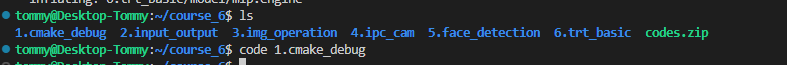
- open new vscode window with `code 1.cmake_debug`
- remove build folder from previous compile in folder explorer

### 2. Compile execuatable file

**All-in-one:** `cmake -S . -B build && cmake --build build`

1. `cmake -S . -B build`
2. `cmake --build build/`
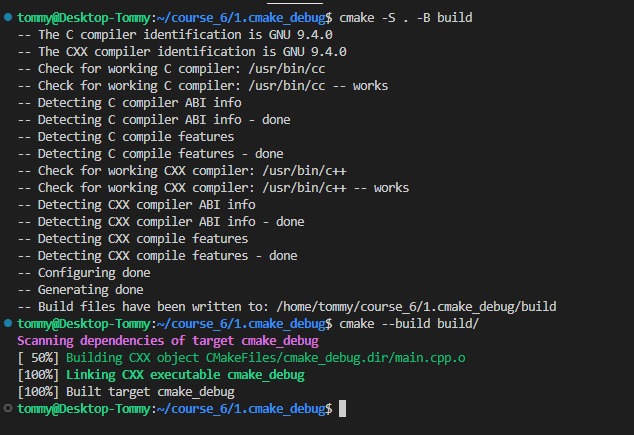

### 3. run exe file
1. `./build/cmake_debug`
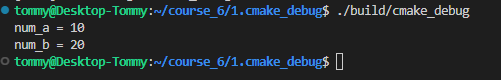

### 4. Build Task
1. create a launch.json file
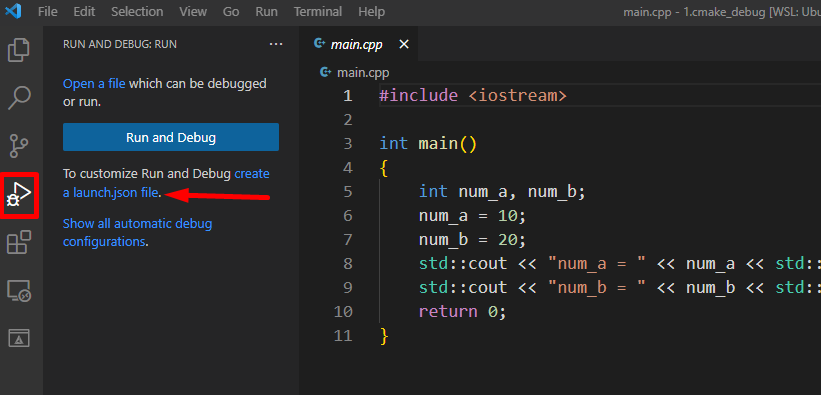

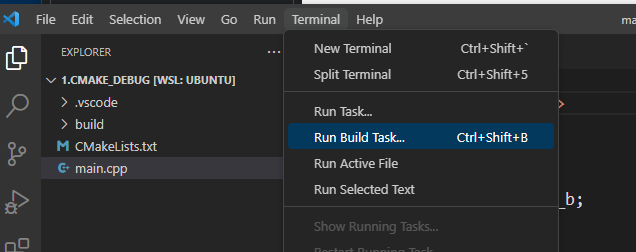
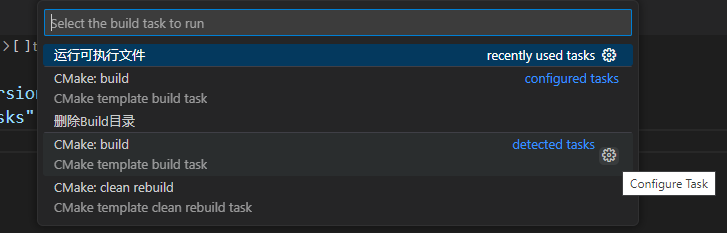
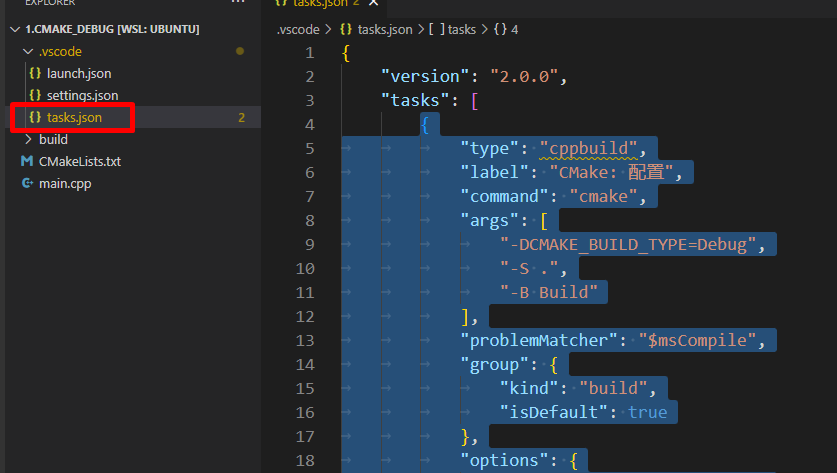

remove the content inside tasks object
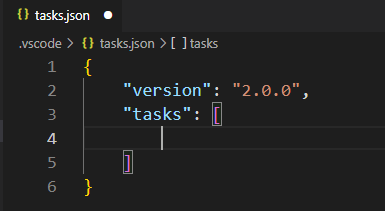

- in the tasks.json, we can find out 4 is depending on 2 and 2 is depending on 1

### 5. First Running code
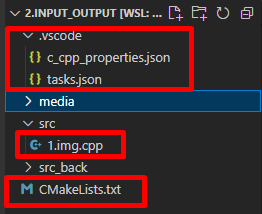

#### 5.1 file "1.img.cpp"
`
// 导入opencv 库
#include <opencv2/opencv.hpp>
#include <iostream>
int main(int argc,char** argv)
{
    //read image
    cv::Mat image=cv::imread("./media/cat.jpg");
    if (image.empty()) {
        std::cout << " can't read image " <<std::endl;
        return 1;
    }
    //print image size
    // 输出图片高度和宽度
	std::cout << "image height: " << image.rows << std::endl;
	std::cout << "image width: " << image.cols << std::endl;
}
`

#### 5.2 file "CMakelists.txt"

`# 最低版本要求
cmake_minimum_required(VERSION 3.10)`

`# 项目信息
project(opencv_demo)`

`# 使用find_package命令查找OpenCV库
find_package(OpenCV REQUIRED)`
`
if (OpenCV_FOUND)
    message(STATUS "OpenCV library status:")
    message(STATUS "    version: ${OpenCV_VERSION}")
    message(STATUS "    libraries: ${OpenCV_LIBS}")
    message(STATUS "    include path: ${OpenCV_INCLUDE_DIRS}")
else()
    message(FATAL_ERROR "Could not find OpenCV library")
endif()`

`#添加可执行文件
add_executable(demo_1.img src/1.img.cpp)`

`target_include_directories(demo_1.img PRIVATE ${OpenCV_INCLUDE_DIRS})
target_link_libraries(demo_1.img PRIVATE ${OpenCV_LIBS})`

`#添加头文件
#include_directories(${OpenCV_INCLUDE_DIRS} ${gflags_INCLUDE_DIRS})
#链接库
#link_libraries(${OpenCV_LIBS} ${gflags_LIBRARIES})`

`#添加可执行文件
#add_executable(demo_1.img src/1.img.cpp)
#add_executable(demo_2.video src/2.video.cpp)
#add_executable(demo_3.camera src/3.camera.cpp)
`

#### 5.3 file "tasks.json"

In [1]:
{
	"version": "2.0.0",
	"tasks": [
		// 1. cmake 配置
		{
			"label": "cmake 配置",
			"type": "shell",
			"command": "cmake -B build -S . -DCMAKE_BUILD_TYPE=Debug",
			"problemMatcher": [],
			"group": {
				"kind": "build",
				"isDefault": true
			},
			"options": {
				"cwd": "${workspaceFolder}"
			}
		},
		// 2. cmake 构建
		{
			"label": "cmake 构建",
			"type": "shell",
			"command": "cmake --build build",
			"problemMatcher": [],
			"group": {
				"kind": "build",
				"isDefault": true
			},
			"options": {
				"cwd": "${workspaceFolder}"
			},
			"dependsOn": [
				"cmake 配置"
			]
		},
		// 3. 删除build 目录
		{
			"label": "删除build 目录",
			"type": "shell",
			"command": "rm -rf build",
			"problemMatcher": [],
			"group": {
				"kind": "build",
				"isDefault": true
			},
			"options": {
				"cwd": "${workspaceFolder}"
			}
		},
		// 4. 运行可执行文件
		{
			"label": "运行可执行文件",
			"type": "shell",
			"command": "./build/demo_${fileBasenameNoExtension}",
			"problemMatcher": [],
			"group": {
				"kind": "build",
				"isDefault": true
			},
			"options": {
				"cwd": "${workspaceFolder}"
			},
			"dependsOn": [
				"cmake 构建"
			]
		}

	]
}


SyntaxError: invalid syntax (726324347.py, line 4)

#### 5.4 Run Build Tasks
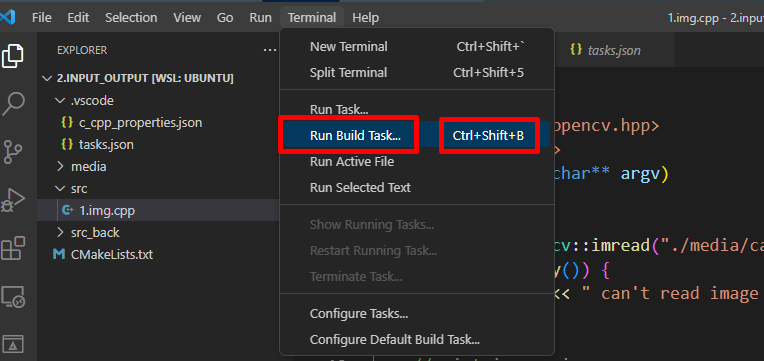
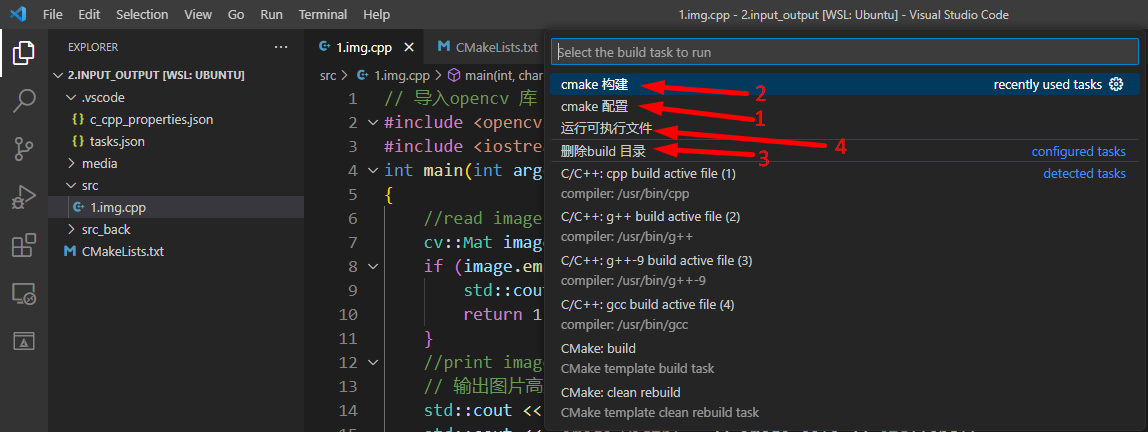

**Run the tasks in order**

#### 1) Configure
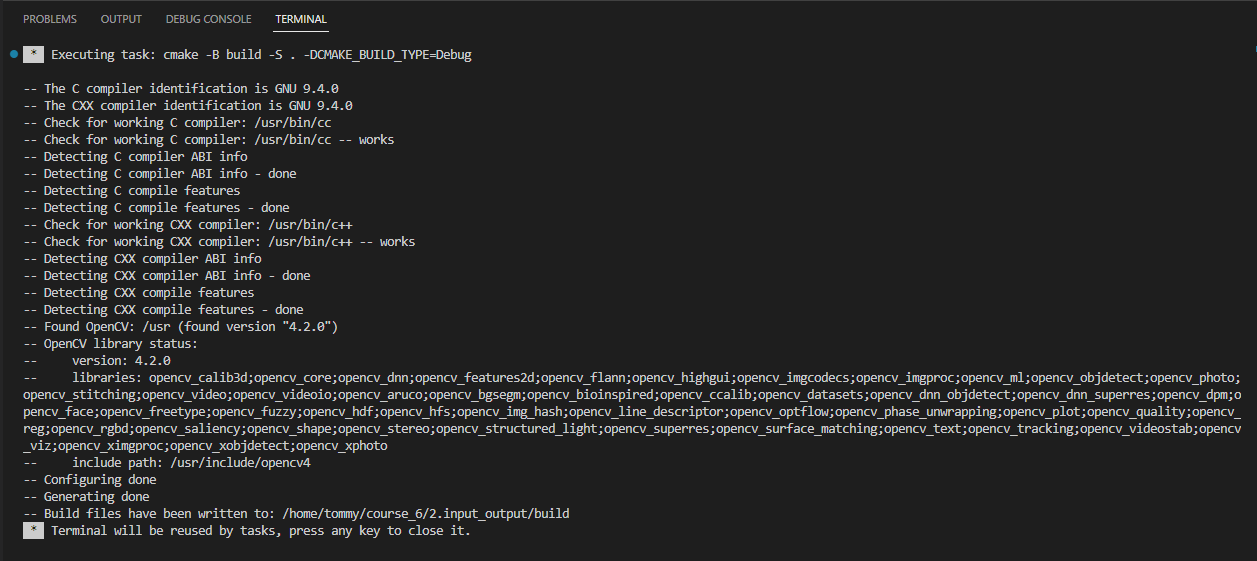

#### 2) Build
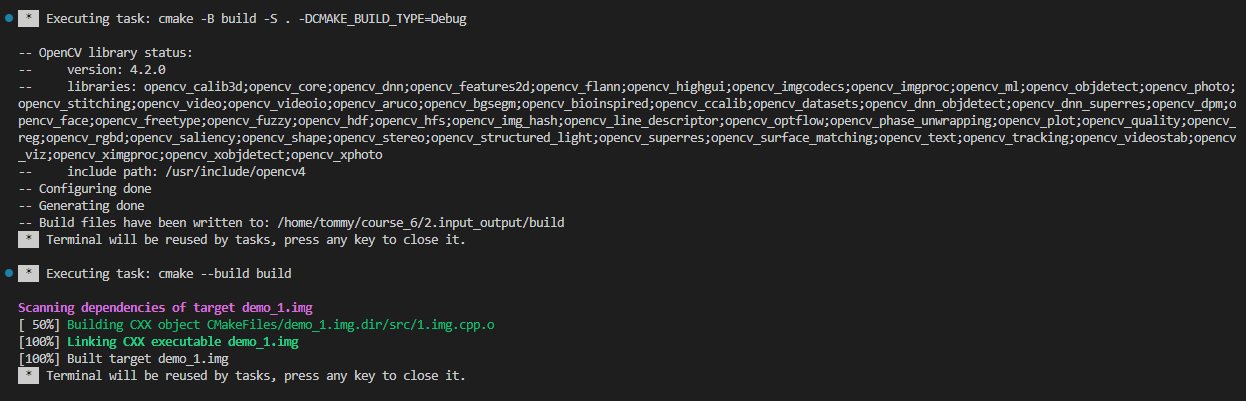

#### 4) Run the Executable
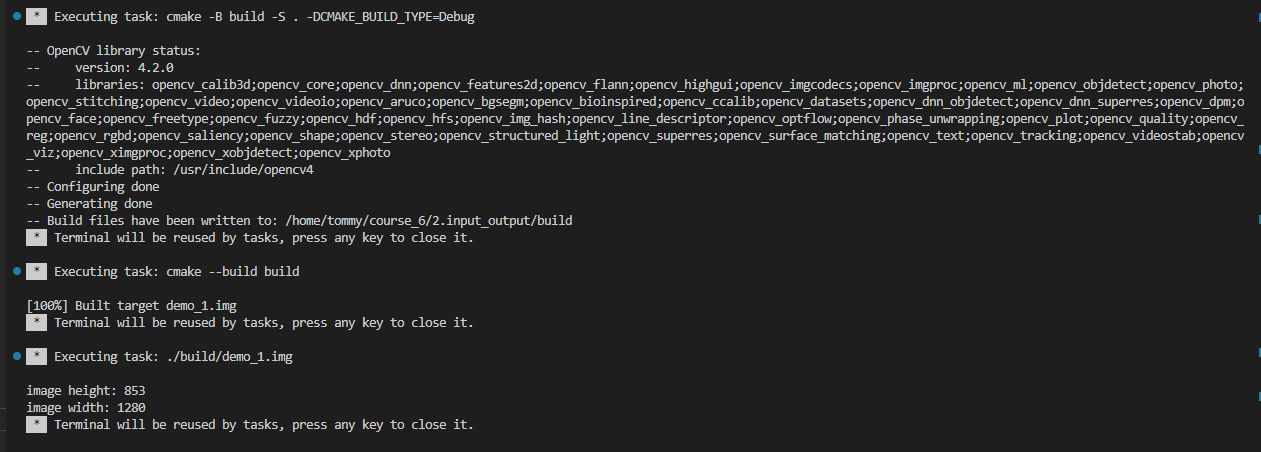

Debug
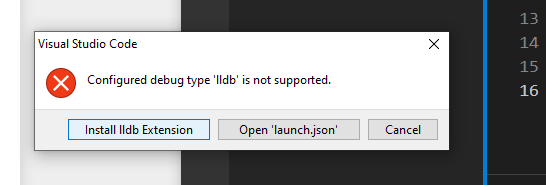
**This one didn't work**
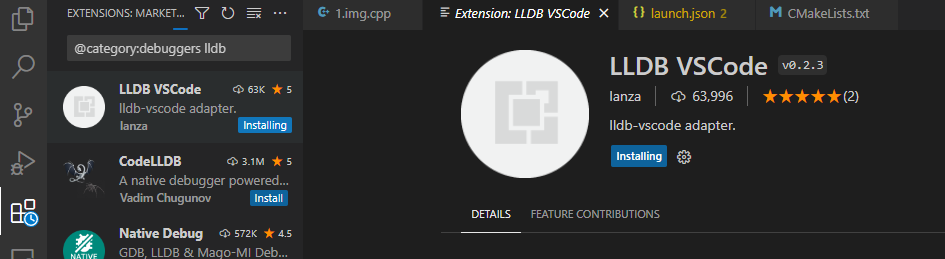

**This one Works!!!!!!!!**
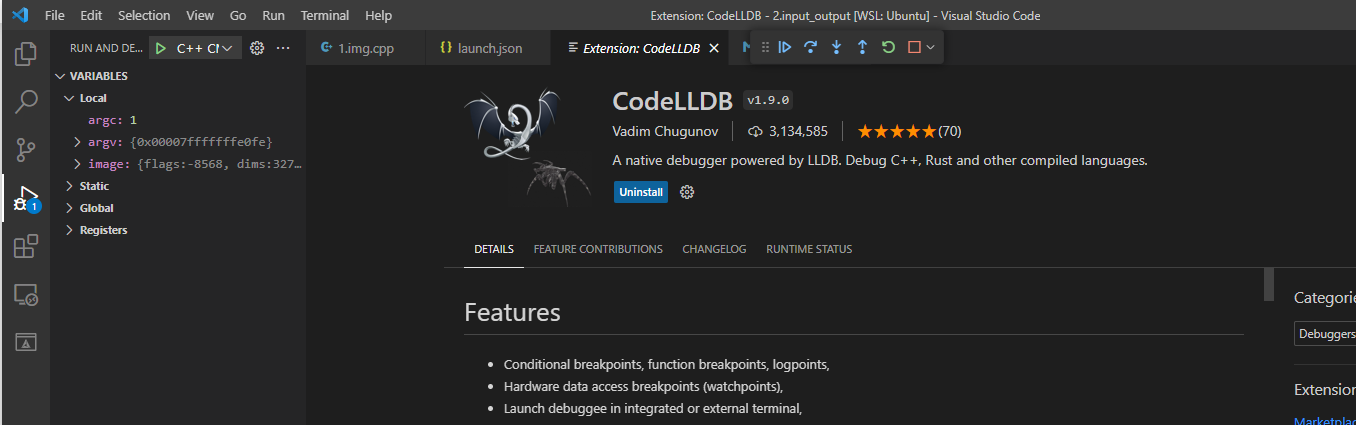

### Install CMake, OpenCV on Ubuntu22.04 for C++ Projects

### Steps: 
- Check Versions: lsb

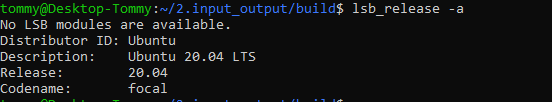

- `sudo apt update && sudo apt upgrade`
- `sudo apt  install cmake`
- `cmake --version`

- **OPENCV**
    为了使用OpenCV，您需要安装OpenCV的库文件。您可以使用以下命令在Ubuntu 22.04中安装OpenCV库：
    - `sudo apt-get install libopencv-dev`

    这将安装OpenCV的所有库和头文件，以便您可以在自己的项目中使用OpenCV。如果您希望使用Python绑定，您还需要安装相应的Python包，您可以使用以下命令安装：
    - `pip install opencv-python`

- 安装gflags库 (gflags是一个Google开源的命令行解析库，一些OpenCV模块需要它来解析命令行参数。)
    - `sudo apt-get install libgflags-dev`